In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Using sklearn

In [118]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [119]:
df.shape

(205, 26)

In [120]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [122]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [123]:
# no null entires are there in the dataset

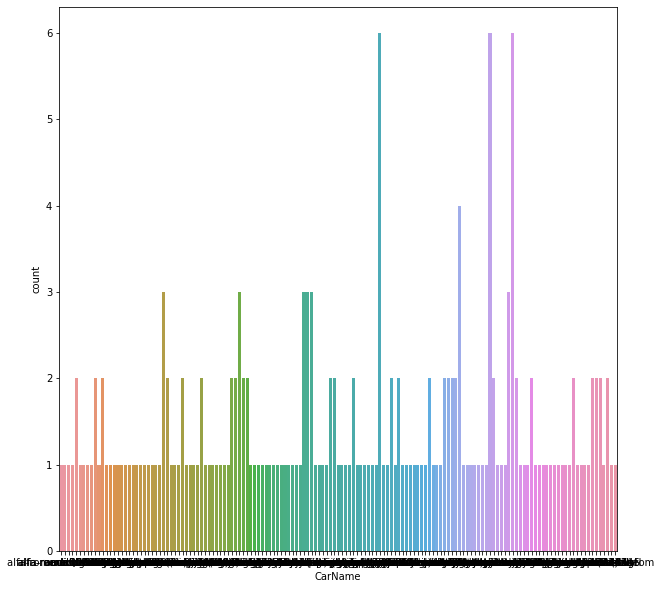

In [124]:
plt.figure(figsize = (10,10))
sns.countplot(df['CarName'])

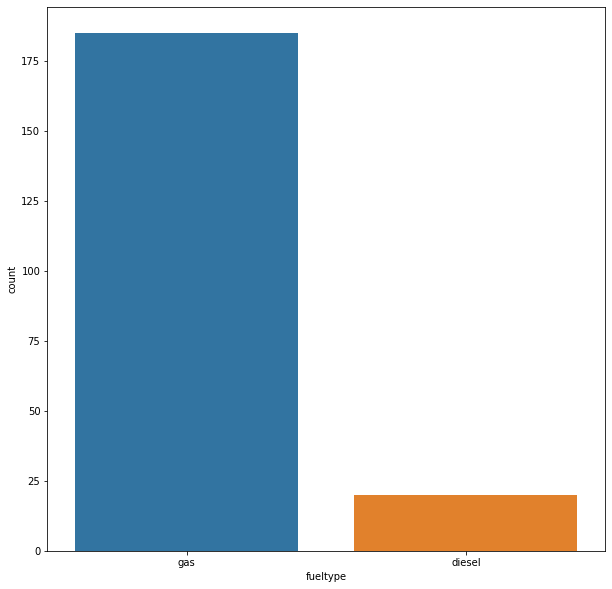

In [125]:
plt.figure(figsize = (10,10))
sns.countplot(df['fueltype'])

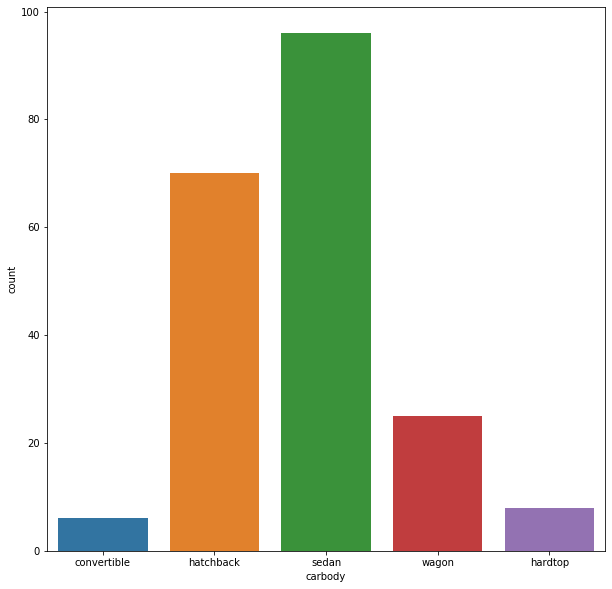

In [126]:
plt.figure(figsize = (10,10))
sns.countplot(df['carbody'])

In [127]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CarName'] = encoder.fit_transform(df['CarName'])
df['fuelsystem'] = encoder.fit_transform(df['fuelsystem'])
df['cylindernumber'] = encoder.fit_transform(df['cylindernumber'])
df['enginetype'] = encoder.fit_transform(df['enginetype'])
df['enginelocation'] = encoder.fit_transform(df['enginelocation'])
df['drivewheel'] = encoder.fit_transform(df['drivewheel'])
df['carbody'] = encoder.fit_transform(df['carbody'])
df['doornumber'] = encoder.fit_transform(df['doornumber'])
df['aspiration'] = encoder.fit_transform(df['aspiration'])
df['fueltype'] = encoder.fit_transform(df['fueltype'])

In [128]:
#seperating the features and output values
x = df.iloc[:,1:-1].values
y = df.iloc[:, 25].values

In [129]:
#checking if features got encoded
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [130]:
#creating the train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 7)

In [131]:
#scaling the features to bring the data in same range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [132]:
print(scaled_x_train.shape)
print(scaled_x_test.shape)

(164, 24)
(41, 24)


In [133]:
#creating the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linearR = LinearRegression()
model = linearR.fit(scaled_x_train,y_train)

In [134]:
y_pred = linearR.predict(scaled_x_test)
print(y_pred)

[12791.07663557 10555.25173103  6727.88977263 16330.77407311
 10624.28183585 24512.99407234 17023.7686847   6257.20299268
 16273.94601065 14795.37334299  6011.67208819  7657.8869478
  5584.04971974 17653.26832772  6577.67177775  5054.21315249
  7893.60129102 24668.09104347  6900.13021207 14308.56736418
  7161.65196542  8882.41559094 11808.31064034 43209.03320356
 13754.07677687 18136.34898587  9381.74116856 23257.70755113
 10256.37236247  7729.41415719  9774.48568525 21840.81504145
  8284.82317312 10314.60105331 34382.71448687 11506.94906712
 23185.76402291  9468.41438212 16590.86889163  5145.34574014
  6027.55997776]


In [135]:
print("Train Accuracy",linearR.score(scaled_x_train,y_train))

Train Accuracy 0.9070474120739018


In [136]:
print("Test Accuracy",linearR.score(scaled_x_test,y_test))

Test Accuracy 0.8050281919208


In [137]:
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.8050281919208


In [138]:
print("intercept :",model.intercept_)
print("coeff :",model.coef_)

intercept : 13373.198170731712
coeff : [ -127.13890919 -1667.71734886  -959.8438632    -83.82358571
  -489.52338294  -958.926148     328.27392357  1167.70042597
   348.21850773   435.27175096   722.77711751   674.27786511
  2458.97812177   281.50425415   159.84415198  2288.23420923
   157.33450058  -617.06481993  -752.86430544  -465.10378626
  2452.24812168   321.7313271    553.9760371    431.89674344]


# Using Gradient Descent

In [139]:
feature_x = df[['horsepower', 'enginesize', 'citympg', 'highwaympg', 'curbweight', 'carlength', 'carwidth']]
X = feature_x.copy()
feature_x = feature_x/np.max(feature_x) #scaling
feature_x = feature_x.values

In [140]:
rows, cols = feature_x.shape
intercept = np.ones((rows,1))
feature_x = np.append(feature_x, intercept, axis=1) 
print(feature_x)

[[0.38541667 0.39877301 0.42857143 ... 0.81114849 0.88658368 1.        ]
 [0.38541667 0.39877301 0.42857143 ... 0.81114849 0.88658368 1.        ]
 [0.53472222 0.46625767 0.3877551  ... 0.8226814  0.90594744 1.        ]
 ...
 [0.46527778 0.53067485 0.36734694 ... 0.90725613 0.95297372 1.        ]
 [0.36805556 0.44478528 0.53061224 ... 0.90725613 0.95297372 1.        ]
 [0.39583333 0.43251534 0.3877551  ... 0.90725613 0.95297372 1.        ]]


In [141]:
m = np.random.randn(cols+1,1)
print(m)

[[0.69157487]
 [0.79311686]
 [0.51164001]
 [0.233419  ]
 [0.52473145]
 [0.4532    ]
 [0.78748488]
 [0.39144257]]


In [142]:
feature_y = df[['price']]
y = feature_y.copy()
feature_y = feature_y/np.max(feature_y)
feature_y = feature_y.values
print(feature_y)

[[0.2972467 ]
 [0.36343612]
 [0.36343612]
 [0.30726872]
 [0.38436123]
 [0.33590308]
 [0.39008811]
 [0.41674009]
 [0.52588106]
 [0.39337372]
 [0.36189427]
 [0.37279736]
 [0.46189427]
 [0.46486784]
 [0.5410793 ]
 [0.67753304]
 [0.91002203]
 [0.8123348 ]
 [0.11345815]
 [0.13865639]
 [0.14482379]
 [0.12273128]
 [0.14046256]
 [0.17526432]
 [0.13720264]
 [0.14740088]
 [0.16759912]
 [0.1885022 ]
 [0.1964978 ]
 [0.28555066]
 [0.14270925]
 [0.15099119]
 [0.1189207 ]
 [0.14381057]
 [0.15702643]
 [0.16068282]
 [0.16068282]
 [0.17389868]
 [0.2003304 ]
 [0.19482379]
 [0.22676211]
 [0.28513216]
 [0.22786344]
 [0.14944934]
 [0.19639868]
 [0.19639868]
 [0.24334802]
 [0.71035242]
 [0.78303965]
 [0.79295154]
 [0.11442731]
 [0.1342511 ]
 [0.1496696 ]
 [0.14746696]
 [0.16288546]
 [0.2410793 ]
 [0.26090308]
 [0.30055066]
 [0.34460352]
 [0.19482379]
 [0.18711454]
 [0.23337004]
 [0.22566079]
 [0.23777533]
 [0.24768722]
 [0.40264317]
 [0.40405286]
 [0.56281938]
 [0.62220264]
 [0.62061674]
 [0.69603524]
 [0.75

In [143]:
n = len(y)
def gradientDescent(X, y, theta, alpha = 0.5, iterations = 0, stepsize = 1, CF = 0):#function for gradient descent
    while abs(stepsize) > 0.000001:
        h = np.dot(X, theta) 
        theta = theta - alpha*(1/n)*(X.T.dot(h-y))
        pCF = CF 
        CF =  np.sum((h-y)**2)
        stepsize = pCF - CF
        iterations = iterations+1
    return theta, CF

In [144]:
theta, CF = gradientDescent(feature_x, feature_y, m)

In [145]:
print(slope)
print(CF)

[[ 0.30794672]
 [ 0.60030455]
 [-0.05843754]
 [ 0.08600026]
 [ 0.33330351]
 [-0.08174278]
 [ 0.55535895]
 [-0.71881708]]
1.1418561121155082


In [146]:
preds = np.dot(feature_x,slope)

In [147]:
print(preds)

[[0.2921461 ]
 [0.2921461 ]
 [0.41178198]
 [0.24082333]
 [0.34031428]
 [0.31152454]
 [0.37227504]
 [0.38129211]
 [0.40940546]
 [0.41127441]
 [0.23143471]
 [0.23143471]
 [0.3825539 ]
 [0.38706243]
 [0.41858804]
 [0.58101494]
 [0.59910678]
 [0.62914782]
 [0.00292429]
 [0.12583329]
 [0.12756322]
 [0.12285246]
 [0.12523029]
 [0.19258122]
 [0.13268986]
 [0.13449327]
 [0.13449327]
 [0.19774554]
 [0.25451845]
 [0.41071491]
 [0.11463036]
 [0.13855149]
 [0.09564949]
 [0.14193946]
 [0.14325103]
 [0.142414  ]
 [0.14526817]
 [0.2143705 ]
 [0.21871508]
 [0.21684152]
 [0.20167616]
 [0.24169294]
 [0.23872918]
 [0.18577113]
 [0.12583329]
 [0.12870236]
 [0.27124719]
 [0.74634952]
 [0.74634952]
 [0.96399831]
 [0.12062923]
 [0.13140455]
 [0.13181441]
 [0.13206874]
 [0.13247861]
 [0.16780805]
 [0.16780805]
 [0.16821792]
 [0.23360652]
 [0.25208292]
 [0.25413226]
 [0.25208292]
 [0.25413226]
 [0.23945213]
 [0.25536185]
 [0.34549687]
 [0.290383  ]
 [0.51640628]
 [0.53567001]
 [0.51610236]
 [0.5434675 ]
 [0.66

In [148]:
print("Score :",np.sum((preds - np.mean(feature_y))**2)/np.sum((feature_y - np.mean(feature_y))**2))

Score : 0.8147141821807171


In [149]:
linearR.intercept_

13373.198170731712

In [150]:
linearR.coef_

array([ -127.13890919, -1667.71734886,  -959.8438632 ,   -83.82358571,
        -489.52338294,  -958.926148  ,   328.27392357,  1167.70042597,
         348.21850773,   435.27175096,   722.77711751,   674.27786511,
        2458.97812177,   281.50425415,   159.84415198,  2288.23420923,
         157.33450058,  -617.06481993,  -752.86430544,  -465.10378626,
        2452.24812168,   321.7313271 ,   553.9760371 ,   431.89674344])